In [1]:
### Import appropriate libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import statsmodels.formula.api as smf     


# plot the graph directly in the notebook
%matplotlib inline

In [48]:
df = pd.read_excel("Wire_bond.xlsx", header=1, index_col=0)

df

,pull strength,die height,post height,loop height,wire lenghth,bond width on the die,bond width on the post
1,8.0,5.2,17.0,28.6,83.0,1.9,1.6
2,8.0,5.2,19.6,29.6,94.9,2.1,2.3
3,8.3,5.8,19.8,32.4,89.7,2.1,1.8
4,8.5,6.4,19.6,31.0,96.2,2.0,2.0
5,8.8,5.8,19.4,32.4,95.6,2.2,2.1
6,9.0,5.2,18.6,28.6,86.5,2.0,1.8
7,9.3,5.6,18.8,30.6,84.5,2.1,2.1
8,9.3,6.0,20.4,32.4,88.8,2.2,1.9
9,9.5,5.2,19.0,32.6,85.7,2.1,1.9
10,9.8,5.8,20.8,32.2,93.6,2.3,2.1


In [51]:

# renaming the columns
df.columns = ['y', 'x1','x2', 'x3', 'x4', 'x5', 'x6']




df.describe()


,y,x1,x2,x3,x4,x5,x6
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,10.227273,6.995455,19.340909,32.190909,88.631818,2.086364,1.945455
std,1.490664,3.777184,1.066663,1.803148,4.759190,0.112527,0.192050
min,8.000000,5.200000,17.000000,28.600000,83.000000,1.900000,1.600000
25%,9.075000,5.600000,18.800000,31.500000,84.675000,2.000000,1.800000
50%,10.150000,5.900000,19.500000,32.400000,87.000000,2.100000,1.900000
75%,11.450000,6.200000,20.125000,33.050000,93.475000,2.100000,2.100000
max,12.500000,18.600000,20.800000,35.400000,96.200000,2.300000,2.300000


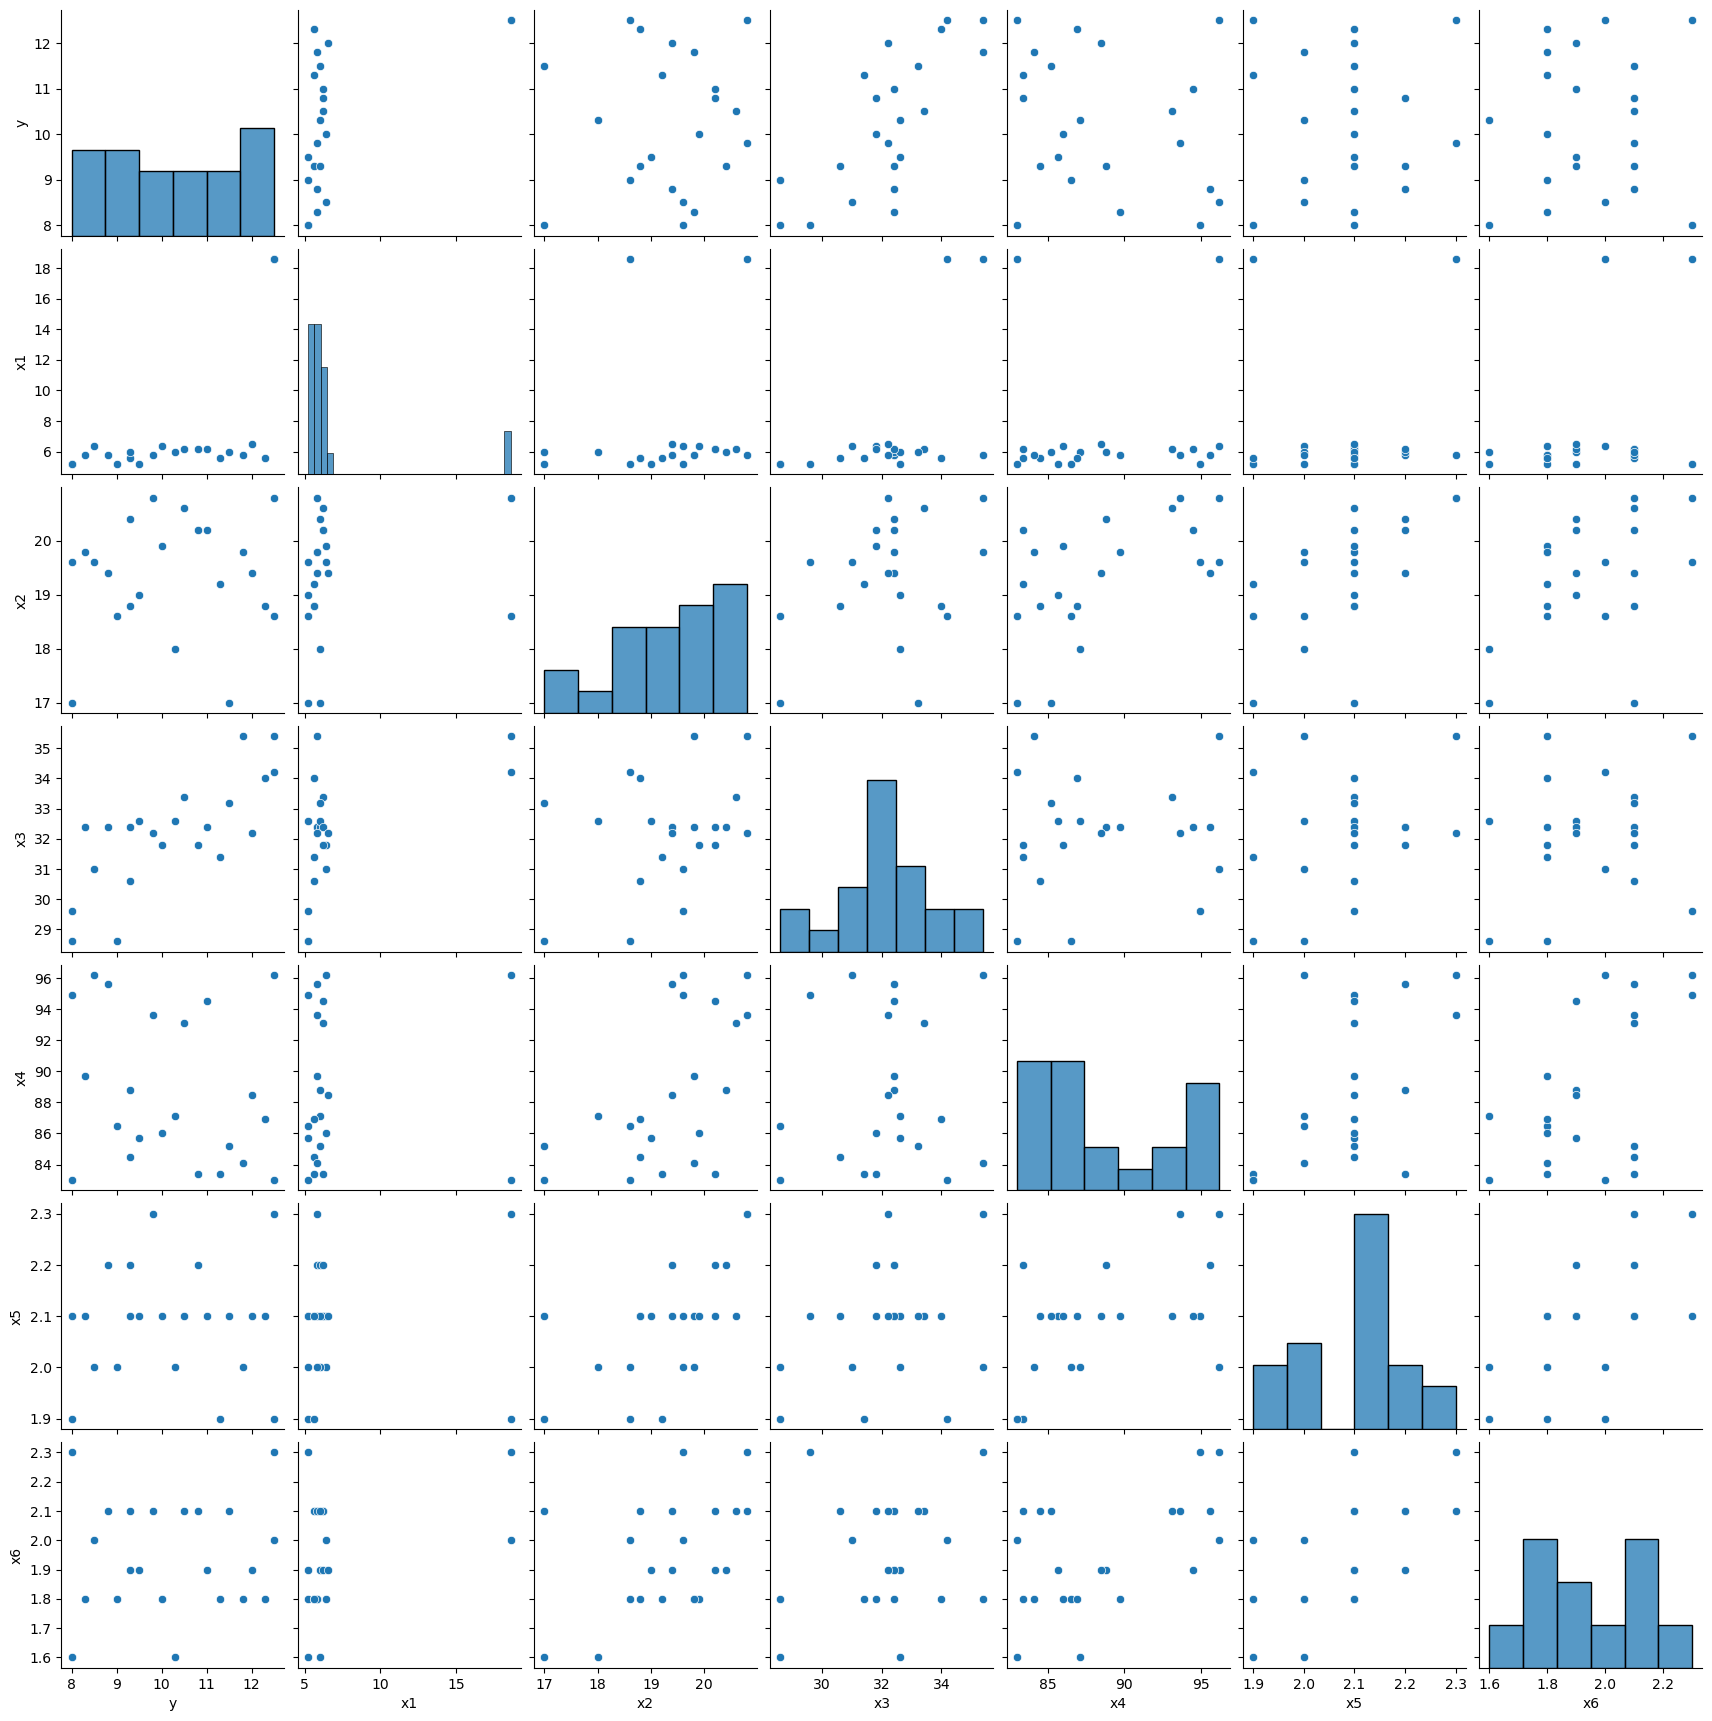

In [52]:
sn.pairplot(df)
plt.show()

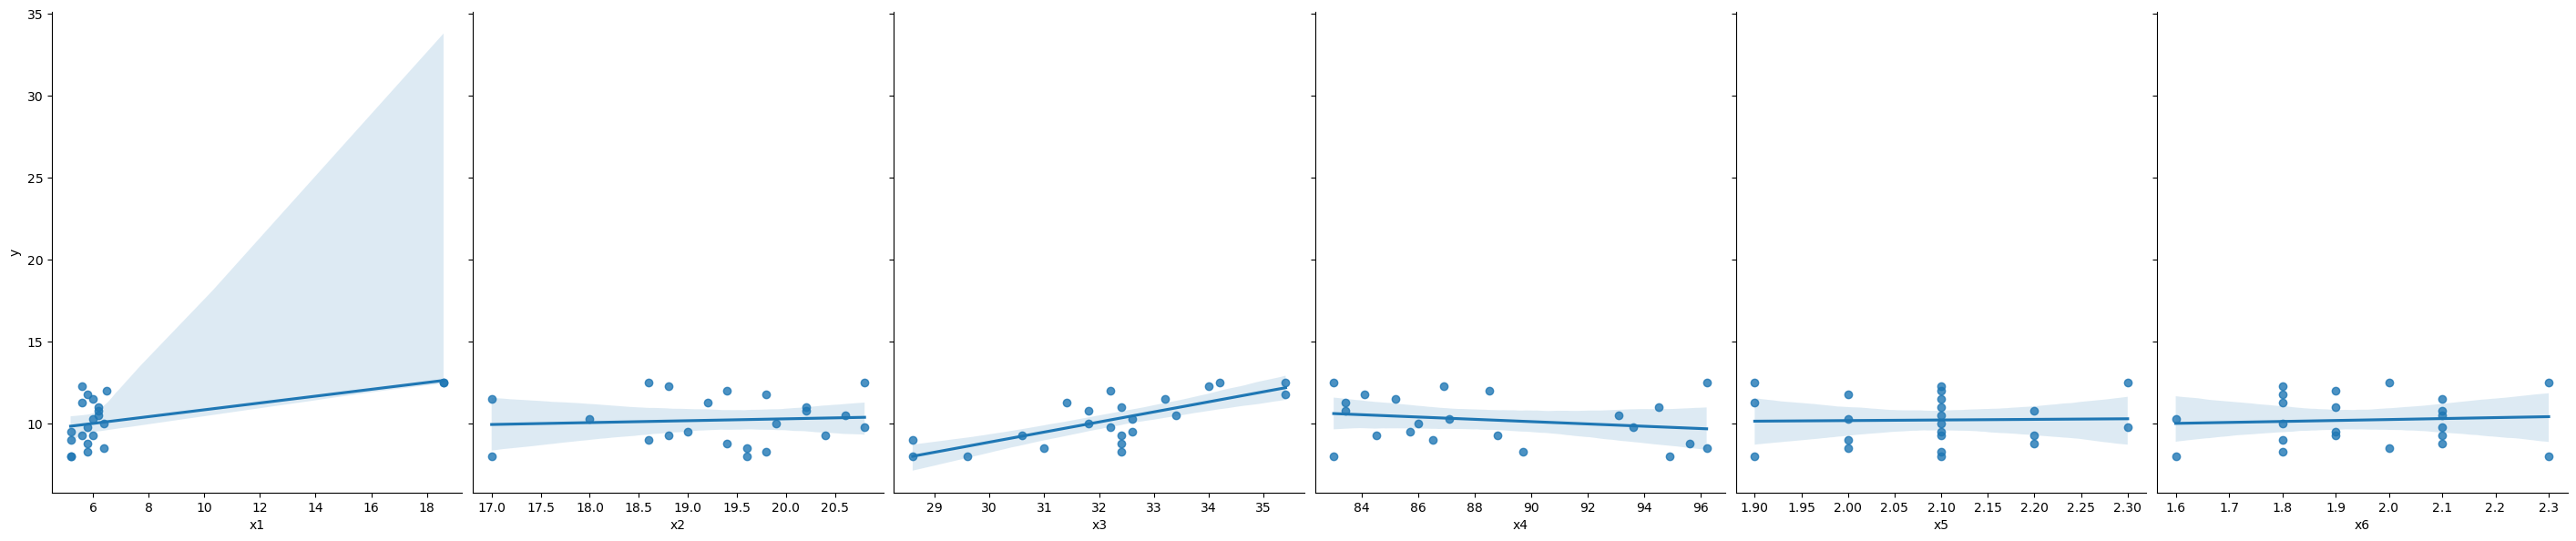

In [53]:
sn.pairplot(data = df, x_vars=['x1','x2','x3','x4','x5','x6'], y_vars=['y'], height = 6, aspect = 0.8, kind='reg')

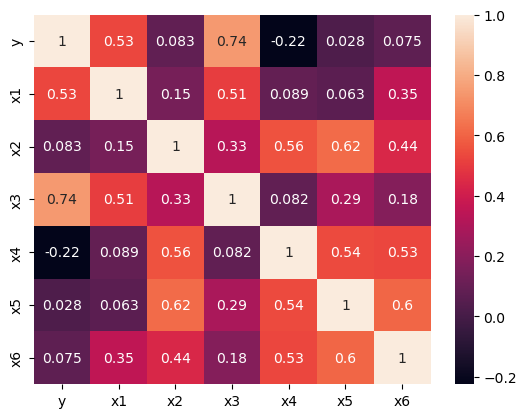

In [54]:
# Compute the correlation matrix
corrMatrix = df.corr()

# Plot the heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()


# Single regression Model

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
lm_linear = smf.ols(formula='y ~ x3', data=df).fit()
print(lm_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     24.82
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           7.16e-05
Time:                        23:06:25   Log-Likelihood:                -30.611
No. Observations:                  22   AIC:                             65.22
Df Residuals:                      20   BIC:                             67.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5769      3.981     -2.406      0.0

### Trying with Multiple regression model now


In [62]:
lm_mul = smf.ols(formula= 'y ~ x1+ x2 +x3+ x4 + x5 +x6', data=df).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     5.244
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00430
Time:                        22:56:48   Log-Likelihood:                -27.051
No. Observations:                  22   AIC:                             68.10
Df Residuals:                      15   BIC:                             75.74
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6737      5.891      0.114      0.910     -11.883      13.231
x1             0.0723      0.076      0.956      0.354      -0.089       0.233
x2             0.0226      0.286      0.079      0.938      -0.587       0.633
x3             0.5602      0.156      3.601      0.003       0.229       0.892
x4            -0.0978      0.061     -1.592      0.132      -0.229       0.033
x5            -1.0217      3.021     -0.338      0.740      -7.461       5.417
x6             0.7078      1.664      0.425      0.677      -2.839       4.255
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.288
Skew:                           0.265   Prob(JB):                        0.866
Kurtosis:                       2.814   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### a)

The summaries of both models indicate that the simple linear regression model is a better fit. In comparing the p-values of all the coefficients in the multiple regression model, only loop height has a p-value below 0.05, while the other coefficients are closer to 1, suggesting they are not highly significant. Additionally, the simple linear model exhibits better F statistics and a low p-value, indicating its significance. Although the multiple regression model shows a higher R-squared value, the difference is not substantial compared to the simple model, as multiple models typically have higher R-squared values. Furthermore, the Adjusted R-squared values are also similar, showing no significant disparity.

### b)

The R-squared value indicates how well the model explains the variation in the dependent variable, with values closer to 1 indicating a better fit. In the case of the simple linear regression model, 55% of the variation in pull strength (Y) is explained by the loop height (X).

### (c)



In [65]:
# With 95% confidence interval
lm_linear.conf_int(0.05)

,0,1
Intercept,-17.880939,-1.272886
x3,0.357634,0.872787


Intercept (Pull Strength when Loop Height is Zero): The 95% confidence interval for the intercept is [-17.88, -1.27]. This implies that when the loop height (the independent variable) is 0, the pull strength of a wire bond is expected to fall within this range, indicating a potential for negative values.

Effect of Loop Height (x4): The confidence interval for the coefficient of loop height is [0.358, 0.873]. This suggests that for each unit increase in loop height, the pull strength is anticipated to increase by an amount between 0.358 and 0.873 units, reflecting a significant positive effect of loop height on pull strength.

### (d)

Effect of Wire Length (x4): The coefficient for wire length (x4) is negative, indicating that increasing its value will result in a decrease in the average pull strength (y) by approximately 0.0978 units for each unit increase in wire length. This suggests an inverse relationship between wire length and pull strength, highlighting the importance of managing this variable in wire bond applications.

### (e)

In [76]:
data = pd.DataFrame({
'x1': [5.5],
'x2': [19.3],
'x3': [30.2],
'x4': [90],
'x5': [2],
'x6': [1.85] })

In [77]:
predicted = lm_linear.predict(data)
print(lm_linear.predict(data))

0    9.002445
dtype: float64


#### 9.002445